## TRABAJO PRÁCTICO 1

In [1]:
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn


   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.5 MB 5.7 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/11.5 MB 4.2 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/11.5 MB 3.8 MB/s eta 0:00:03
   --------- ------------------------------ 2.6/11.5 MB 3.4 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/11.5 MB 2.8 MB/s eta 0:00:04
   ---------- ----------------------------- 2.9/11.5 MB 2.8 MB/s eta 0:00:04
   ---------- ----------------------------- 2.9/11.5 MB 2.8 MB/s eta 0:00:04
   ---------- ----------------------------- 3.1/11.5 MB 1.8 MB/s eta 0:00:05
   ---------- ----------------------------- 3.1/11.5 MB 1.8 MB/s eta 0:00:05
   ---------- ----------------------------- 3.1/11.5 MB 1.8 MB/s eta 0:00:05
   ---------- ----------------------------- 3.1/11.5 MB 1.8 MB/s eta 0:00:05
   ---------- ----------------------------- 3.1/11.5 MB 1.8 MB/s eta 0:00:05
   --

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 699.0 kB/s eta 0:00:11
   -- ------------------------------------- 0.5/7.8 MB 699.0 kB/s eta 0:00:11
   -- ------------------------------------- 0.5/7.8 MB 699.0 kB/s eta 0:00:11
   ---- ----------------------------------- 0.8/7.8 MB 493.7 kB/s eta 0:00:15
   ---- ----------------------------------- 0.8/7.8 MB 493.7 kB/s eta 0:00:15
   ---- ----------------------------------- 0.8/7.8 MB 493.7 kB/s eta 0:00:15
   ---- ----------------------------------- 0.8/7.8 MB 493.7 kB/s eta 0:00:15
   ----- ---------------------------------- 1.0/7.8 MB 437.6 kB/s eta 0:00:16
   ----- ---------------------------------- 1.0/7.8 MB 437.6 kB/s eta 0:00:16
   ----- ---------------------------------- 1.0/7.8 MB 437.6 kB/s eta 0:00:16
   ----- ----

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 429.7 kB/s eta 0:00:25
   - -------------------------------------- 0.5/11.0 MB 429.7 kB/s eta 0:00:25
   - -------------------------------------- 0.5/11.0 MB 429.7 kB/s eta 0:00:25
   - -------------------------------------- 0.5/11.0 MB 429.7 kB/s eta 0:00:25
   -- ------------------------------------- 0.8/11.0 MB 338.9 kB/s eta 0:00:31
   -- ------------------------------------- 0.8/11.0 MB 338.9 kB/s eta 0:00:31
   -- ------------------------------------- 0.8/11.0 MB 338.9 kB/s eta 0:00:31
   --- --------------------

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Decision Tree CLassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression


In [3]:
archivo = "top5-players.csv"

# Leer datos del archivo
ds = pd.read_csv(archivo)
ds

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,23.0,2000.0,20,13,...,0.00,0.07,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22.0,2000.0,30,14,...,0.14,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19.0,2003.0,7,1,...,0.00,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,17.0,2006.0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,5,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,35.0,1987.0,31,31,...,0.13,0.00,0.13,0.10,0.10,0.11,0.01,0.12,0.09,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,2848,Lovro Zvonarek,hr CRO,"FW,MF",Bayern Munich,de Bundesliga,18.0,2005.0,5,1,...,0.55,0.00,0.55,0.55,0.55,0.04,0.12,0.15,0.04,0.15
2848,2849,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,24.0,1998.0,35,35,...,0.23,0.29,0.52,0.17,0.47,0.22,0.28,0.50,0.17,0.45
2849,2850,Milan Đurić,ba BIH,FW,Hellas Verona,it Serie A,33.0,1990.0,20,13,...,0.37,0.07,0.45,0.30,0.37,0.34,0.09,0.43,0.16,0.25
2850,2851,Milan Đurić,ba BIH,FW,Monza,it Serie A,33.0,1990.0,17,13,...,0.29,0.07,0.36,0.29,0.36,0.21,0.05,0.26,0.21,0.26


In [4]:
ds.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls_90', 'Ast_90', 'G+A_90', 'G-PK_90', 'G+A-PK_90', 'xG_90', 'xAG_90',
       'xG+xAG_90', 'npxG_90', 'npxG+xAG_90'],
      dtype='object')

In [5]:
dsNum= ds[["Age", "Ast", "Ast_90"]]
dsNum

,Age,Ast,Ast_90
0,23.0,1,0.07
1,22.0,2,0.14
2,19.0,1,0.89
3,17.0,0,0.00
4,35.0,0,0.00
...,...,...,...
2847,18.0,0,0.00
2848,24.0,10,0.29
2849,33.0,1,0.07
2850,33.0,1,0.07


In [6]:
dsNum.head()

,Age,Ast,Ast_90
0,23.0,1,0.07
1,22.0,2,0.14
2,19.0,1,0.89
3,17.0,0,0.00
4,35.0,0,0.00


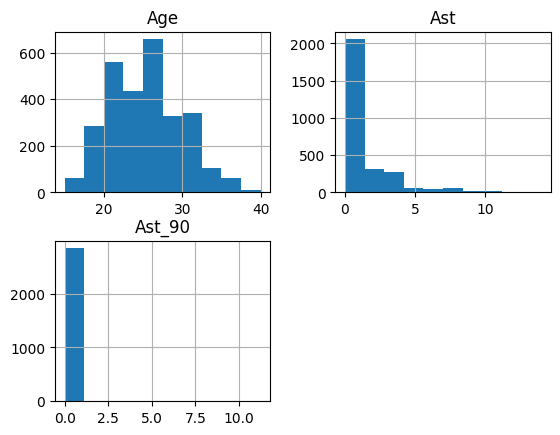

In [7]:
dsNum.hist()
plt.show()

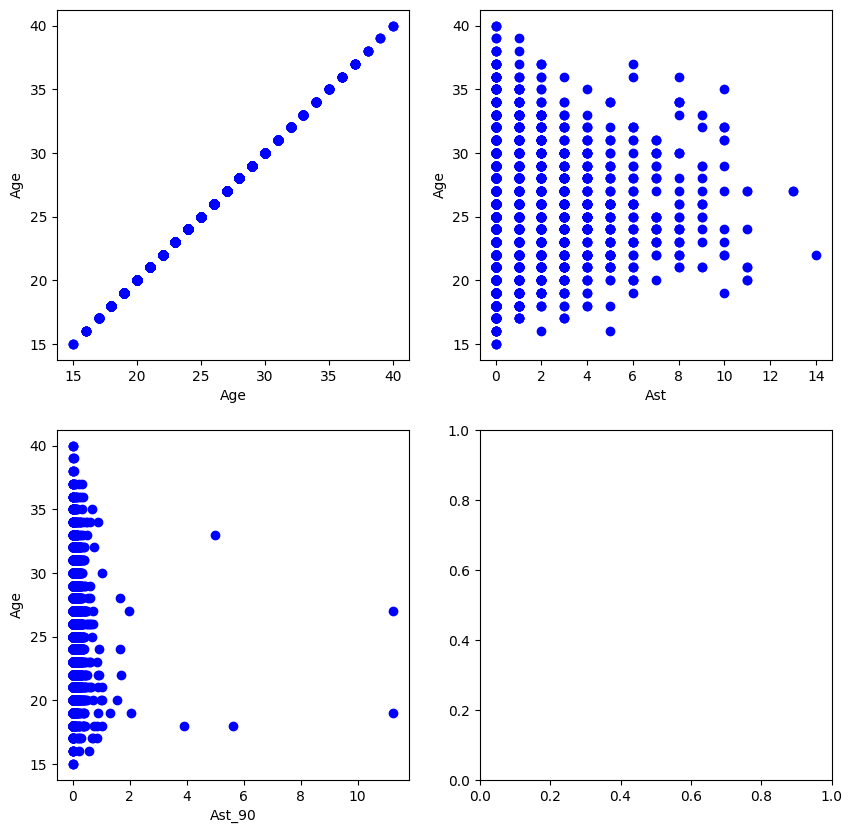

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, e in enumerate(dsNum[["Age", "Ast", "Ast_90"]]):
    axs[i // 2, i % 2].scatter(dsNum[e], dsNum["Age"], color="blue")
    axs[i // 2, i % 2].set_xlabel(e)
    axs[i // 2, i % 2].set_ylabel("Age")

Text(0.5, 1.0, 'Age')

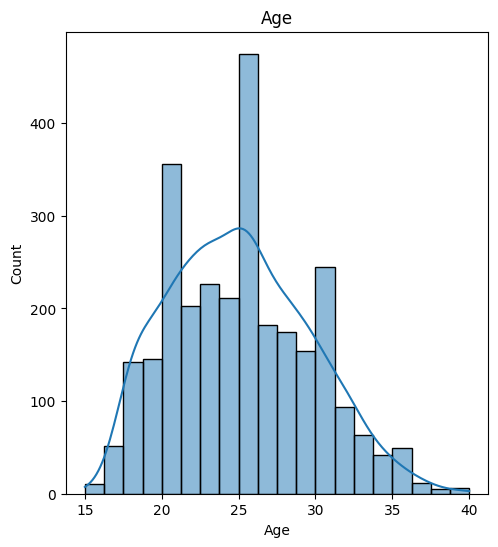

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(dsNum["Age"], bins=20, kde=True)
plt.title("Age")

Text(0.5, 1.0, 'Ast')

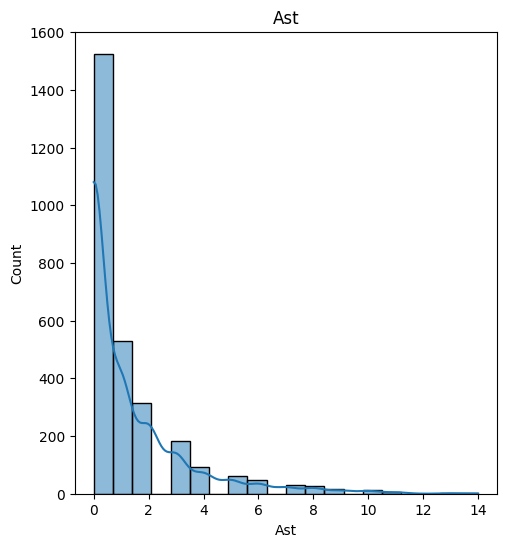

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(dsNum["Ast"], bins=20, kde=True)
plt.title("Ast")

# Train Test split

In [11]:
X = ds[["Age", "Ast", "Ast_90"]]  # Features
y = ds["Gls"] > ds["Gls"].mean()

X = X.fillna(0)

X, y

(       Age  Ast  Ast_90
 0     23.0    1    0.07
 1     22.0    2    0.14
 2     19.0    1    0.89
 3     17.0    0    0.00
 4     35.0    0    0.00
 ...    ...  ...     ...
 2847  18.0    0    0.00
 2848  24.0   10    0.29
 2849  33.0    1    0.07
 2850  33.0    1    0.07
 2851  20.0    0    0.00
 
 [2852 rows x 3 columns],
 0       False
 1        True
 2       False
 3       False
 4        True
         ...  
 2847    False
 2848     True
 2849     True
 2850     True
 2851    False
 Name: Gls, Length: 2852, dtype: bool)

In [12]:
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(2852, 3)


((2281, 3), (571, 3), (2281,), (571,))

# Logistic Regression

## Training

In [13]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train.values.ravel())

LogisticRegression()

## Prediction

In [14]:
y_pred = log_model.predict(X_test)

In [15]:
y_test.value_counts()

Gls
False    405
True     166
Name: count, dtype: int64

## Confusion Matrix

Accuracy: 0.7740805604203153


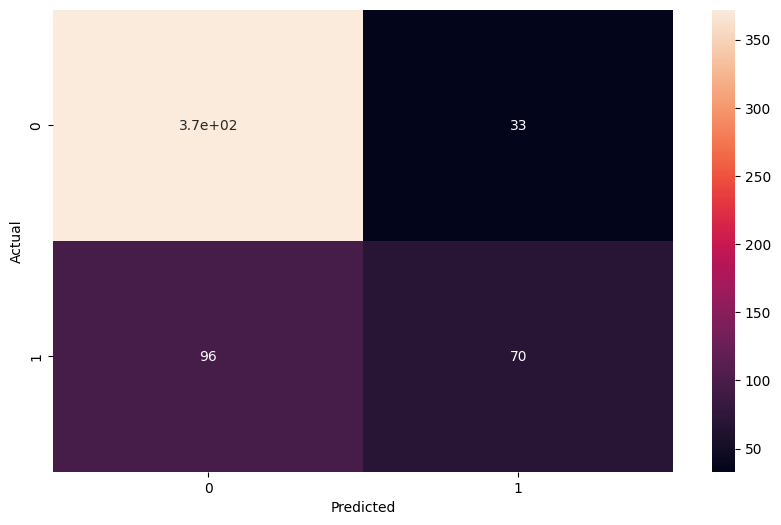

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

## ROC AUC

In [17]:
roc_auc_score(y_test, y_pred, average=None)

np.float64(0.6701026327532351)

# Decision tree (numeral tree)

## Training

In [18]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

## Prediction

In [19]:
y_pred = dt_model.predict(X_test)

In [20]:
y_test.value_counts()

Gls
False    405
True     166
Name: count, dtype: int64

## Confusion Matrix

Accuracy: 0.7373029772329247
              precision    recall  f1-score   support

       False       0.78      0.87      0.82       405
        True       0.57      0.42      0.48       166

    accuracy                           0.74       571
   macro avg       0.67      0.64      0.65       571
weighted avg       0.72      0.74      0.72       571



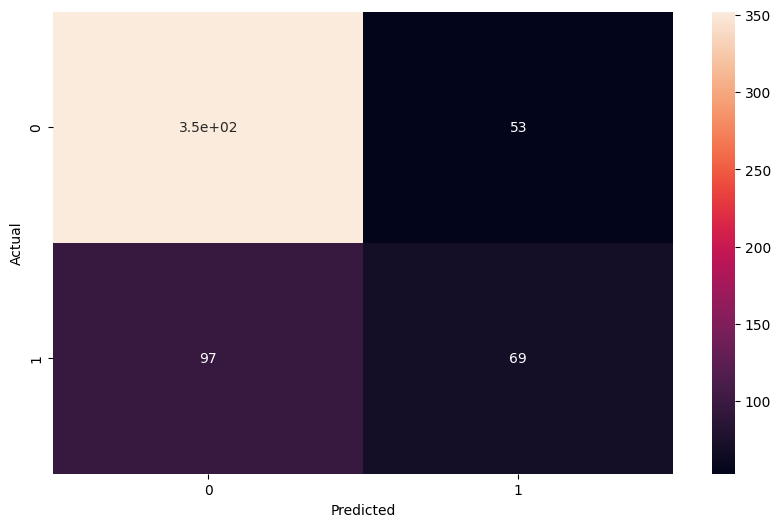

In [21]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

print(classification_report(y_test, y_pred))

## ROC AUC

In [22]:
roc_auc_score(y_test, y_pred, average=None)

np.float64(0.6423992265357727)

# Decision tree (categorical tree)

## One Hot Encoding

In [26]:
ds = pd.read_csv("top5-players.csv")

# Posiciones (Pos)
ds = pd.get_dummies(ds, columns=["Pos"])

# Ligas (Comp)
ds = pd.get_dummies(ds, columns=["Comp"])

ds


,Rk,Player,Nation,Squad,Age,Born,MP,Starts,Min,90s,...,"Pos_FW,MF",Pos_GK,Pos_MF,"Pos_MF,DF","Pos_MF,FW",Comp_de Bundesliga,Comp_eng Premier League,Comp_es La Liga,Comp_fr Ligue 1,Comp_it Serie A
0,1,Max Aarons,eng ENG,Bournemouth,23.0,2000.0,20,13,1237,13.7,...,False,False,False,False,False,False,True,False,False,False
1,2,Brenden Aaronson,us USA,Union Berlin,22.0,2000.0,30,14,1267,14.1,...,False,False,False,False,True,True,False,False,False,False
2,3,Paxten Aaronson,us USA,Eint Frankfurt,19.0,2003.0,7,1,101,1.1,...,False,False,True,False,False,True,False,False,False,False
3,4,Keyliane Abdallah,fr FRA,Marseille,17.0,2006.0,1,0,4,0.0,...,False,False,False,False,False,False,False,False,True,False
4,5,Yunis Abdelhamid,ma MAR,Reims,35.0,1987.0,31,31,2781,30.9,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,2848,Lovro Zvonarek,hr CRO,Bayern Munich,18.0,2005.0,5,1,163,1.8,...,True,False,False,False,False,True,False,False,False,False
2848,2849,Martin Ødegaard,no NOR,Arsenal,24.0,1998.0,35,35,3091,34.3,...,False,False,True,False,False,False,True,False,False,False
2849,2850,Milan Đurić,ba BIH,Hellas Verona,33.0,1990.0,20,13,1204,13.4,...,False,False,False,False,False,False,False,False,False,True
2850,2851,Milan Đurić,ba BIH,Monza,33.0,1990.0,17,13,1257,14.0,...,False,False,False,False,False,False,False,False,False,True


In [29]:
ds.columns

Index(['Rk', 'Player', 'Nation', 'Squad', 'Age', 'Born', 'MP', 'Starts', 'Min',
       '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG',
       'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls_90', 'Ast_90',
       'G+A_90', 'G-PK_90', 'G+A-PK_90', 'xG_90', 'xAG_90', 'xG+xAG_90',
       'npxG_90', 'npxG+xAG_90', 'Pos_DF', 'Pos_DF,FW', 'Pos_DF,MF', 'Pos_FW',
       'Pos_FW,DF', 'Pos_FW,MF', 'Pos_GK', 'Pos_MF', 'Pos_MF,DF', 'Pos_MF,FW',
       'Comp_de Bundesliga', 'Comp_eng Premier League', 'Comp_es La Liga',
       'Comp_fr Ligue 1', 'Comp_it Serie A'],
      dtype='object')

## Train Test Split

In [30]:
X = ds[["Age", "Ast", "Ast_90", "Pos_DF", "Pos_DF,FW", "Pos_DF,MF", "Pos_FW",
       "Pos_FW,DF", "Pos_FW,MF", "Pos_GK", "Pos_MF", "Pos_MF,DF", "Pos_MF,FW",
       "Comp_de Bundesliga", "Comp_eng Premier League", "Comp_es La Liga",
       "Comp_fr Ligue 1", "Comp_it Serie A"]]  # Features
y = ds["Gls"] > ds["Gls"].mean()

X = X.fillna(0)

X, y

(       Age  Ast  Ast_90  Pos_DF  Pos_DF,FW  Pos_DF,MF  Pos_FW  Pos_FW,DF  \
 0     23.0    1    0.07    True      False      False   False      False   
 1     22.0    2    0.14   False      False      False   False      False   
 2     19.0    1    0.89   False      False      False   False      False   
 3     17.0    0    0.00   False      False      False    True      False   
 4     35.0    0    0.00    True      False      False   False      False   
 ...    ...  ...     ...     ...        ...        ...     ...        ...   
 2847  18.0    0    0.00   False      False      False   False      False   
 2848  24.0   10    0.29   False      False      False   False      False   
 2849  33.0    1    0.07   False      False      False    True      False   
 2850  33.0    1    0.07   False      False      False    True      False   
 2851  20.0    0    0.00   False      False      False   False      False   
 
       Pos_FW,MF  Pos_GK  Pos_MF  Pos_MF,DF  Pos_MF,FW  Comp_de Bundesliga

In [36]:
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(2852, 18)


((2281, 18), (571, 18), (2281,), (571,))

## Training

In [37]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

## Prediction

In [38]:
y_pred = dt_model.predict(X_test)

In [39]:
y_test.value_counts()


Gls
False    405
True     166
Name: count, dtype: int64

## Confusion Matrix

Accuracy: 0.7635726795096323
              precision    recall  f1-score   support

       False       0.82      0.85      0.84       405
        True       0.60      0.56      0.58       166

    accuracy                           0.76       571
   macro avg       0.71      0.70      0.71       571
weighted avg       0.76      0.76      0.76       571



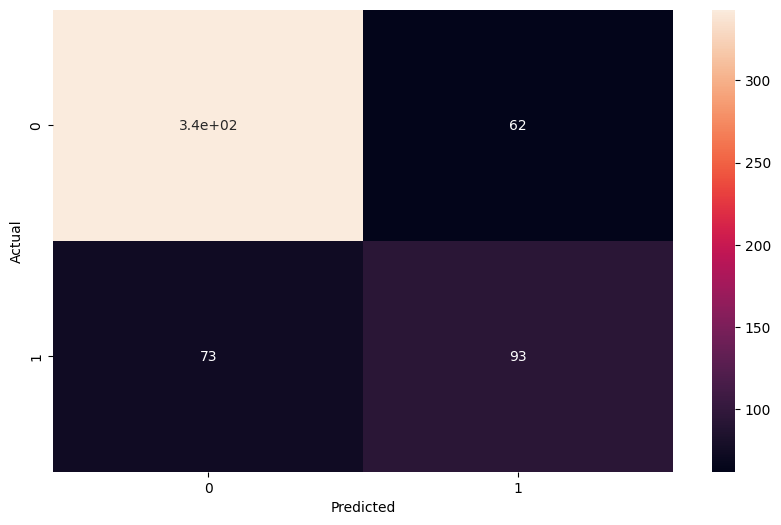

In [40]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

print(classification_report(y_test, y_pred))

## ROC AUC

In [41]:
roc_auc_score(y_test, y_pred, average=None)

np.float64(0.7035772720511676)